### Setup for SparkNLP & Read the Entire Dataset

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.functions import col, lit, count, isnan, when
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import json
from pyspark.ml import Pipeline
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline

In [0]:
comments_final = spark.read.parquet("/Dataset/comments_final")
submissions_final = spark.read.parquet("/Dataset/submissions_final")

In [0]:
## Extract subreddits from submissions
datingapp_df_submission = submissions_final.filter((col("subreddit")=='Bumble') | (col("subreddit")=='Tinder')|(col("subreddit")=='hingeapp')|(col("subreddit")=='dating')| (col("subreddit")=='DatingApps')).cache()

relationship_df_submission = submissions_final.filter((col("subreddit")=='relationships') | (col("subreddit")=='AskMen') | (col("subreddit")=='AskWomen')).cache()

advice_df_submission = submissions_final.filter((col("subreddit")=='relationship_advice') | (col("subreddit")=='datingoverforty')|(col("subreddit")=='datingoverthirty')| (col("subreddit")=='datingadvice')| (col("subreddit")=='datingoverforty')| (col("subreddit")=='datingoverfifty')).cache()

## Extract subreddits from comments
datingapp_df_comments = comments_final.filter((col("comment_subreddit")=='Bumble') | (col("comment_subreddit")=='Tinder')|(col("comment_subreddit")=='hingeapp')|(col("comment_subreddit")=='dating')| (col("comment_subreddit")=='DatingApps')).cache()

relationship_df_comments = comments_final.filter((col("comment_subreddit")=='relationships') | (col("comment_subreddit")=='AskMen') | (col("comment_subreddit")=='AskWomen')).cache()

advice_df_comments = comments_final.filter((col("comment_subreddit")=='relationship_advice') | (col("comment_subreddit")=='datingoverforty')|(col("comment_subreddit")=='datingoverthirty')| (col("comment_subreddit")=='datingadvice')| (col("comment_subreddit")=='datingoverforty')| (col("comment_subreddit")=='datingoverfifty')).cache()

In [0]:
##Check Missing Values
for col in datingapp_df_submission.columns:
    print(col, "with null values: ", datingapp_df_submission.filter(datingapp_df_submission[col].isNull()).count())

id with null values:  0
permalink with null values:  0
author with null values:  0
created_utc with null values:  0
subreddit with null values:  0
subreddit_id with null values:  0
selftext with null values:  0
title with null values:  0
num_comments with null values:  0
score with null values:  0
is_self with null values:  0
over_18 with null values:  0
edited with null values:  0
domain with null values:  0
stickied with null values:  0
locked with null values:  0


In [0]:
comments_final.limit(5).toPandas().head()

,author,body,can_gild,controversiality,comment_created_utc,edited,gilded,comment_id,link_id,parent_id,comment_score,stickied,comment_subreddit,subreddit_id
0,Duckington1225,"Easy: ""I'm not offended by homosexuality. In t...",True,0,1637857103,false,0,hm1qfu7,t3_r1zowj,t3_r1zowj,45,False,DunderMifflin,t5_2s9h3
1,ImperialNavyPilot,So you discount the millions of views on those...,True,0,1637857103,false,0,hm1qfu8,t3_r1jsld,t1_hm1fwks,0,False,StarWars,t5_2qi4s
2,DragonsEatGold,I would probably say Barret's Angermax Limit B...,True,0,1637857103,false,0,hm1qfu9,t3_r1zlox,t1_hm1p0d3,1,False,FinalFantasy,t5_2qhdi
3,Actuallycares97,"So pleased about this breakthrough, may it lea...",True,0,1637857103,false,0,hm1qfua,t3_r1ych3,t3_r1ych3,7,False,ColdCaseUK,t5_13yzaa
4,mysteryboi07,:/ how bout a mr beast nita skin,True,0,1637857103,false,0,hm1qfub,t3_r1t5qi,t3_r1t5qi,1,False,Brawlstars,t5_3k7ez


In [0]:
submissions_final.limit(5).toPandas().head()

,id,permalink,author,created_utc,subreddit,subreddit_id,selftext,title,num_comments,score,is_self,over_18,edited,domain,stickied,locked
0,x0o2c8,/r/TrendingQuickTVnews/comments/x0o2c8/russia_...,swagNextTuber,1661777734,TrendingQuickTVnews,t5_3hv7k4,,Russia Staging 'Bloody Show' Near Zaporizhzhia...,0,1,False,False,false,newsweek.com,False,False
1,x0o2ca,/r/PlusSizeHotwives/comments/x0o2ca/what_about...,WildyValentine,1661777734,PlusSizeHotwives,t5_hche3,,What about curvy &amp; geek? 🤓,1,5,False,True,false,i.redd.it,False,False
2,x0o2cb,/r/Asuka/comments/x0o2cb/all_in_your_head/,ESCORTREAPER,1661777734,Asuka,t5_377dh,,"""All in your head""",1,1,False,False,false,i.redd.it,False,False
3,x0o2cc,/r/PickleFinancial/comments/x0o2cc/if_gherks_f...,IrideAscooter,1661777734,PickleFinancial,t5_5xvplx,,If Gherk's former coffee roaster was a perfume...,1,5,False,False,false,youtube.com,False,False
4,x0o2cf,/r/Watchexchange/comments/x0o2cf/wts_omega_spe...,watchesandbracelets,1661777734,Watchexchange,t5_2sqne,,[WTS] Omega Speedmaster Automatic 3513.50 39mm,7,14,False,False,false,i.redd.it,False,False


### Clean text data

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Out[49]: True

In [0]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

documentAssembler = DocumentAssembler() \
     .setInputCol('body') \
     .setOutputCol('document')
tokenizer = Tokenizer() \
     .setInputCols(['document']) \
     .setOutputCol('token')
# note normalizer defaults to changing all words to lowercase.
# Use .setLowercase(False) to maintain input case.
normalizer = Normalizer() \
     .setInputCols(['token']) \
     .setOutputCol('normalized') \
     .setLowercase(True)
# note that lemmatizer needs a dictionary. So I used the pre-trained
# model (note that it defaults to english)
lemmatizer = LemmatizerModel.pretrained() \
     .setInputCols(['normalized']) \
     .setOutputCol('lemma')
stopwords_cleaner = StopWordsCleaner() \
     .setInputCols(['lemma']) \
     .setOutputCol('clean_lemma') \
     .setCaseSensitive(False) \
     .setStopWords(eng_stopwords)
#stemmer = Stemmer() \
#    .setInputCols(["cleanTokens"]) \
#    .setOutputCol("stem")# Convert custom document structure to array of tokens.
# finisher converts tokens to human-readable output
finisher = Finisher() \
     .setInputCols(['clean_lemma']) \
     .setCleanAnnotations(False)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


In [0]:
pipeline = Pipeline() \
     .setStages([
           documentAssembler,
           tokenizer,
           normalizer,
           lemmatizer,
           stopwords_cleaner,
           finisher
     ])

In [0]:
df_text = advice_df_comments.select("body")
#result = pipeline.fit(df_text).transform(df_text)
#result.cache

In [0]:
result.printSchema()

root
 |-- body: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- token: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 

In [0]:
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                body|            document|               token|          normalized|               lemma|         clean_lemma|finished_clean_lemma|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Not sure about Ca...|[{document, 0, 15...|[{token, 0, 2, No...|[{token, 0, 2, no...|[{token, 0, 2, no...|[{token, 4, 7, su...|[sure, canadian, ...|
|Get off reddit an...|[{document, 0, 22...|[{token, 0, 2, Ge...|[{token, 0, 2, ge...|[{token, 0, 2, ge...|[{token, 0, 2, ge...|[get, reddit, cal...|
|Have you tried ex...|[{document, 0, 42...|[{token, 0, 3, Ha...|[{token, 0, 3, ha...|[{token, 0, 3, ha...|[{token, 9, 13, t...|[try, explain, lo...|
|How on earth woul...|[{document, 0, 65...|[{token, 0, 2, Ho...|[{token, 0, 2, ho...|[{token, 0, 2, ho...|

In [0]:
result.select('finished_clean_lemma').show(5)

+--------------------+
|finished_clean_lemma|
+--------------------+
|[sure, canadian, ...|
|[get, reddit, cal...|
|[try, explain, lo...|
|[earth, would, ye...|
|[find, another, p...|
+--------------------+
only showing top 5 rows



### Add external data
##### Acquire, clean, and merge your external data source(s) onto your Reddit data. Produce appropriate charts/tables showing the distribution of your external data alongside your Reddit data.

In [0]:
cidea_df = spark.read.csv("/FileStore/crazy_ideas.csv",header = True)
cidea_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- author: string (nullable = true)
 |-- name: string (nullable = true)
 |-- num_comments: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: string (nullable = true)
 |-- selftext: string (nullable = true)
 |-- stickied: string (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)



In [0]:
cidea_df.show(10)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+----------+--------------------+--------------------+
|                 _c0|              author|                name|        num_comments|           permalink|               score|            selftext|stickied| subreddit|               title|                 url|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------+----------+--------------------+--------------------+
|                   0|      AddictedReddit|           t3_854s2f|                  33|/r/CrazyIdeas/com...|                 212|"This whole subre...|    null|      null|                null|                null|
|The rules on poli...| **repeat Rule 4 ...| you can get your...|                True|          CrazyIdeas|Folks, be sure to...|https://www.reddi...|    null

In [0]:
print("cidea_df has ",cidea_df.count(), "Rows",  len(cidea_df.columns), "Columns")

cidea_df has  1305 Rows 11 Columns


In [0]:
cidea_1 = cidea_df.select('name','selftext')
comments_final_merged = comments_final.join(cidea_1, comments_final["link_id"] == cidea_1["name"],"LEFT")

In [0]:
comments_final_merged.show(5)

+---------------+--------------------+--------+----------------+-------------------+------+------+----------+---------+----------+-------------+--------+-----------------+------------+----+--------+
|         author|                body|can_gild|controversiality|comment_created_utc|edited|gilded|comment_id|  link_id| parent_id|comment_score|stickied|comment_subreddit|subreddit_id|name|selftext|
+---------------+--------------------+--------+----------------+-------------------+------+------+----------+---------+----------+-------------+--------+-----------------+------------+----+--------+
|         RaukkM|Yep, but HRT is l...|    true|               0|         1649701685| false|     0|   i4bre6x|t3_u15maj| t3_u15maj|            1|   false|          egg_irl|    t5_3n3op|null|    null|
|          -SSN-|I just always und...|    true|               0|         1649701685| false|     0|   i4bre6y|t3_u1a31v|t1_i4bjjg7|            4|   false|        greentext|    t5_2srr9|null|    null|
|17BC

### Conduct your natural language processing work
##### the most common words overall or over time

In [0]:
words = result.select('finished_clean_lemma').withColumn('exploded_text', f.explode(col('finished_clean_lemma')))
words.cache
words.select("exploded_text").show(5, truncate = False)

+-------------+
|exploded_text|
+-------------+
|sure         |
|canadian     |
|law          |
|uk           |
|would        |
+-------------+
only showing top 5 rows



In [0]:
counts = words.select('exploded_text').groupby('exploded_text').count()
counts.cache
counts.show()

+-------------+-------+
|exploded_text|  count|
+-------------+-------+
|         hope| 527208|
|        still|1095088|
|socialization|   1215|
|  transaction|   3605|
|       online| 117923|
|       travel|  60585|
|     cautious|  13598|
|  interaction|  43304|
|   likelihood|   7373|
|     priority|  68426|
|     everyday|  40137|
|         guts|   6369|
|  requirement|  13185|
|          dbt|   2457|
|    recognize|  60130|
|        cramp|   3874|
|     randomly|  18001|
|       poetry|   1818|
|      embrace|  11365|
|      jewelry|   6747|
+-------------+-------+
only showing top 20 rows



In [0]:
counts = counts.sort('count', ascending=False)
counts.show()

+-------------+-------+
|exploded_text|  count|
+-------------+-------+
|         like|5295819|
|          get|5011931|
|         dont|4709528|
|         want|4097680|
|           go|3883954|
|        think|3528252|
|         make|3497607|
|          say|3442645|
|         know|3278519|
|        would|3051691|
|         time|3021567|
|           im|3008075|
| relationship|2903738|
|         feel|2801615|
|        youre|2709597|
|         need|2697123|
|        thing|2658036|
|         good|2486916|
|       please|2419266|
|       people|2407141|
+-------------+-------+
only showing top 20 rows



In [0]:
counts.show(50)

+-------------+-------+
|exploded_text|  count|
+-------------+-------+
|         like|5295819|
|          get|5011931|
|         dont|4709528|
|         want|4097680|
|           go|3883954|
|        think|3528252|
|         make|3497607|
|          say|3442645|
|         know|3278519|
|        would|3051691|
|         time|3021567|
|           im|3008075|
| relationship|2903738|
|         feel|2801615|
|        youre|2709597|
|         need|2697123|
|        thing|2658036|
|         good|2486916|
|       please|2419266|
|       people|2407141|
|         tell|2319239|
|         take|2303684|
|          one|2174970|
|          see|2167435|
|      someone|2128832|
|         well|2114895|
|       doesnt|1888679|
|         even|1859472|
|       really|1850752|
|          way|1848259|
|     question|1831959|
|          try|1824923|
|       friend|1804471|
|          hes|1737372|
|          ask|1734543|
|         work|1650398|
|         give|1621133|
|         also|1563889|
|         life|1

### Conduct your natural language processing work
##### the distribution of text lengths

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.functions import col, lit, count, isnan, when

In [0]:
advice_df_comments = advice_df_comments.withColumn("length", f.length(col("body")))

In [0]:
len=advice_df_comments.limit(10000)

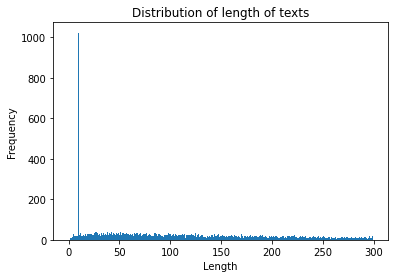

In [0]:
import matplotlib.pyplot as plt
plt.hist(len.select('length').toPandas(), range(0,300))
plt.title("Distribution of length of texts")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### Conduct your natural language processing work
##### important words according to TF-IDF

In [0]:
from pyspark.ml.feature import HashingTF, IDF

# To generate Term Frequency
hashingTF = HashingTF(inputCol="finished_clean_lemma", outputCol="rawFeatures", numFeatures=1000)

# To generate Inverse Document Frequency
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5)

tfidfpipeline = Pipeline().setStages([hashingTF, idf])

result_tfidf = tfidfpipeline.fit(result).transform(result)

In [0]:
result_tfidf.cache
result_tfidf.printSchema()

root
 |-- body: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- token: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 

In [0]:
result_tfidf.select('finished_clean_lemma', 'features').show(truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Identify important keywords for your reddit data

In [0]:
from pyspark.sql.types import DoubleType, ArrayType

# Extract the "values" field from "features", which is the owrd weight
sparse_values = f.udf(lambda v: v.values.tolist(), ArrayType(DoubleType()))

words_weight = result_tfidf.select('finished_clean_lemma', 'features') \
.withColumn("features", sparse_values("features")) \
.withColumn("new", f.arrays_zip("finished_clean_lemma", "features")) \
.withColumn("new", f.explode("new")) \
.select(f.col("new.finished_clean_lemma").alias("word"), f.col("new.features").alias("weight"))

words_weight.cache

Out[42]: <bound method DataFrame.cache of DataFrame[word: string, weight: double]>

In [0]:
words_weight_sum = words_weight.na.drop().groupby('word').sum("weight").sort("sum(weight)", ascending=False)
words_weight_sum.cache
words_weight_sum.show(100)

+------------+--------------------+
|        word|         sum(weight)|
+------------+--------------------+
|        like|1.7546694684598092E7|
|         get|1.6758149544342697E7|
|        dont|  1.50581013151614E7|
|        want|1.2628876647024443E7|
|          go|1.2129049527859086E7|
|       think| 1.143714828918221E7|
|         say|1.1357782831418099E7|
|        make|1.1115300544027245E7|
|        know| 1.027034911799731E7|
|       would|   9982086.463467563|
|          im|   9890311.407536255|
|        time|     9486243.0327471|
|        feel|   8731303.082994318|
|       youre|   8710752.808277352|
|relationship|   8482133.358946197|
|       thing|   8328705.116041235|
|        need|   8284214.520266936|
|      people|   7892496.479761041|
|        tell|   7600351.926629196|
|        take|   7121521.478740653|
|         one|   7026559.999494618|
|        good|   6973189.857084825|
|         see|   6902145.732599198|
|     someone|   6625797.271787008|
|        well|   6352065.329

##### Use regex searches to create at least two dummy variables to identify comments of particular topics.

In [0]:
advice_df_comments_dum = advice_df_comments

In [0]:
advice_df_comments_dum = advice_df_comments_dum.withColumn('love', advice_df_comments_dum.body.like('%touch%') | advice_df_comments_dum.body.like('%kiss%') | advice_df_comments_dum.body.like('%hug%') | advice_df_comments_dum.body.like('%cuddle%') | advice_df_comments_dum.body.like('%sex%'))
advice_df_comments_dum = advice_df_comments_dum.withColumn('dating', advice_df_comments_dum.body.like('%restaurant%') | advice_df_comments_dum.body.like('%coffee%') | advice_df_comments_dum.body.like('%dinner%') | advice_df_comments_dum.body.like('%brunch%') | advice_df_comments_dum.body.like('%vibe%') | advice_df_comments_dum.body.like('%chat%') | advice_df_comments_dum.body.like('%match%'))
advice_df_comments_dum = advice_df_comments_dum.withColumn('entertainment', advice_df_comments_dum.body.like('%game%') | advice_df_comments_dum.body.like('%movie%') | advice_df_comments_dum.body.like('%video%') | advice_df_comments_dum.body.like('%book%'))
advice_df_comments_dum = advice_df_comments_dum.withColumn('dailylife', advice_df_comments_dum.body.like('%food%') | advice_df_comments_dum.body.like('%drink%') | advice_df_comments_dum.body.like('%sleep%') | advice_df_comments_dum.body.like('%company%'))
advice_df_comments_dum = advice_df_comments_dum.withColumn('religion', advice_df_comments_dum.body.like('%religion%'))
advice_df_comments_dum = advice_df_comments_dum.withColumn('relationship', advice_df_comments_dum.body.like('%parent%') | advice_df_comments_dum.body.like('%family%') | advice_df_comments_dum.body.like('%couple%'))

In [0]:
advice_df_comments_dum = advice_df_comments_dum.withColumn('topic', F.when(col("love") == True, "love") \
                                     .when(col("dating") == True, "dating") \
                                     .when(col("entertainment") == True, "entertainment") \
                                     .when(col("dailylife") == True, "dailylife") \
                                     .when(col("religion") == True, "religion") \
                                     .when(col("relationship") == True, "relationship") \
                                     .otherwise("none"))

advice_df_comments_dum = advice_df_comments_dum.drop("love", "dating", "entertainment", "dailylife", "religion", "relationship")

In [0]:
advice_df_comments_dum.groupby("topic").count().show()

+-------------+--------+
|        topic|   count|
+-------------+--------+
|         none|14706632|
|     religion|   20350|
|         love| 1549279|
|    dailylife|  362229|
|       dating|  325255|
| relationship|  977488|
|entertainment|  320667|
+-------------+--------+



##### Summary table for 'topic'

In [0]:
topic_summary = advice_df_comments_dum.select('topic','comment_score').na.drop() \
                        .filter(col("topic")!="none") \
                        .groupby("topic")\
                        .agg(f.count('comment_score').alias('count'),
                             f.mean('comment_score').alias('mean'),
                             f.stddev('comment_score').alias('std'),
                             f.min('comment_score').alias('min'),
                             f.expr('percentile(comment_score, array(0.25))')[0].alias('%25'),
                             f.expr('percentile(comment_score, array(0.5))')[0].alias('%50'),
                             f.expr('percentile(comment_score, array(0.75))')[0].alias('%75'),
                             f.max('comment_score').alias('max'))

topic_summary.show()

+-------------+-------+------------------+-----------------+-----+---+---+---+-----+
|        topic|  count|              mean|              std|  min|%25|%50|%75|  max|
+-------------+-------+------------------+-----------------+-----+---+---+---+-----+
|     religion|  20350| 9.687469287469288|77.17324650518239| -325|1.0|2.0|4.0| 4187|
|         love|1549279|12.012438689222535|94.64285903156633|-2174|1.0|1.0|4.0|17015|
|    dailylife| 362229| 12.95405944858087|98.44483079046536| -904|1.0|2.0|5.0| 9371|
|       dating| 325255|10.234837281517578|77.61530614667586| -649|1.0|2.0|4.0| 5942|
| relationship| 977488| 14.75417396428396|106.7615062204316|-1082|1.0|2.0|5.0|12367|
|entertainment| 320667| 10.96573392335351|84.02435101844529| -578|1.0|2.0|4.0|10628|
+-------------+-------+------------------+-----------------+-----+---+---+---+-----+



### Build a sentiment model

In [0]:
documentAssembler = DocumentAssembler()\
    .setInputCol("body")\
    .setOutputCol("document")
    
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = SentimentDLModel.pretrained(name='sentimentdl_use_imdb', lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl
      ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_imdb download started this may take some time.
Approximate size to download 12 MB
[OK!]


In [0]:
#Advice Sentiment
advice_result_nlp = nlpPipeline.fit(advice_df_comments).transform(advice_df_comments)
advice_result_nlp.cache

Out[56]: <bound method DataFrame.cache of DataFrame[author: string, body: string, can_gild: boolean, controversiality: bigint, comment_created_utc: bigint, edited: string, gilded: bigint, comment_id: string, link_id: string, parent_id: string, comment_score: bigint, stickied: boolean, comment_subreddit: string, subreddit_id: string, length: int, document: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>, sentence_embeddings: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>, sentiment: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>]>

In [0]:
advice_comments_nlp = advice_result_nlp.withColumn('sentiment', col('sentiment.result')[0]).drop('sentence_embeddings').drop('document')
advice_comments_nlp.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- comment_created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- comment_subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length: integer (nullable = true)
 |-- sentiment: string (nullable = true)



In [0]:
advice_sentiment_summary = advice_comments_nlp.select('sentiment', 'comment_score').groupby("sentiment").agg(count('comment_score'), f.mean('comment_score'))
advice_sentiment_summary.dropna().show()

+---------+--------------------+------------------+
|sentiment|count(comment_score)|avg(comment_score)|
+---------+--------------------+------------------+
|      pos|             7858956| 9.469905162975845|
|      neg|            10224959| 10.36717105662722|
|  neutral|              177808| 12.20227436335823|
+---------+--------------------+------------------+



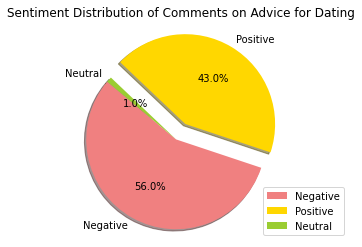

In [0]:
#senti_summary = pd.DataFrame(data = {"sentiment": ["Negative", "Positive", "Neural"], "Count": [10224959, 7858955, 177809], "Avg_score": [10.36717105662722, 9.469905986228449, 12.202222609654179]})

import matplotlib.pyplot as plt

# Data to plot
labels = "Negative", "Positive", "Neutral"
sizes = [10224959, 7858955, 177809]

# Definitions
colors = ['lightcoral','gold', 'yellowgreen', 'lightskyblue']

# explode 1st slice
explode = (0, 0.2, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.legend(labels, loc="lower right")
plt.title("Sentiment Distribution of Comments on Advice for Dating")

plt.axis('equal')
plt.show()

In [0]:
import altair as alt

alt.Chart(advice_comments_nlp.sample(fraction = 0.0005).toPandas()).transform_density(
    'score',
    as_=['score', 'density'],
    extent=[-5, 20],
    groupby=['sentiment']
).mark_area(orient='horizontal').encode(
    y='score:Q',
    color='sentiment:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'sentiment:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

In [0]:
import seaborn as sns
advice_comments_nlp_small = advice_comments_nlp.sample(fraction = 0.0005).toPandas()

In [0]:
advice_comments_nlp_small.head()

,author,body,can_gild,controversiality,comment_created_utc,edited,gilded,comment_id,link_id,parent_id,comment_score,stickied,comment_subreddit,subreddit_id,length,sentiment
0,pettawawa,I am going to come at this from a woman’s poin...,True,0,1615721966,false,0,gqw3i3i,t3_m4tjqi,t3_m4tjqi,2,False,relationship_advice,t5_2r0cn,261,pos
1,Uppernwbear,The way you describe yourself are probably you...,True,0,1654023782,false,0,iap2nhh,t3_v1xdps,t3_v1xdps,3,False,relationship_advice,t5_2r0cn,619,pos
2,MuffinTop4Ever,The just-getting-started growth,True,0,1654025005,false,0,iap473z,t3_v1umlx,t1_iap3ygy,2,False,datingoverfifty,t5_12ieog,31,pos
3,JaynaBeeJules,He is actively lying to you and witholding inf...,True,0,1644531696,false,0,hwff8yp,t3_spii6g,t3_spii6g,3,False,relationship_advice,t5_2r0cn,183,pos
4,Ok_Faithlessness_625,No,True,0,1615120826,false,0,gq3by54,t3_lzkeha,t1_gq316kf,6,False,relationship_advice,t5_2r0cn,2,neg


In [0]:
df1 = advice_comments_nlp_small[["comment_score","sentiment"]]
df1.head()

,comment_score,sentiment
0,2,pos
1,3,pos
2,2,pos
3,3,pos
4,6,neg


In [0]:
df2 = df1[(df1["comment_score"] >= -100) &  (df1["comment_score"] <= 200)]

In [0]:
df2 = df2.pivot(columns = "sentiment", values = "comment_score" )
df2.head()

sentiment,neg,neutral,pos
0,NaN,NaN,2.0
1,NaN,NaN,3.0
2,NaN,NaN,2.0
3,NaN,NaN,3.0
4,6.0,NaN,NaN


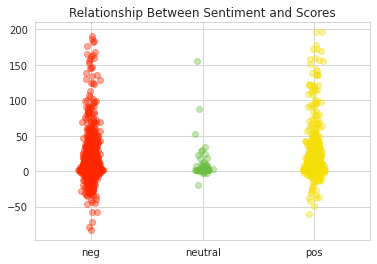

In [0]:
vals, names, xs = [],[],[]
for i, col in enumerate(df2.columns):
    vals.append(df2[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.03, df2[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
plt.boxplot(vals, labels=names)
palette = ['#ff2700', '#6bbe41', '#f6de09']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.title("Relationship Between Sentiment and Scores")

plt.show()    


##### Summary table for 'topic' and 'sentiment'

In [0]:
#Advice Sentiment with dummy variables
advice_dum_nlp = nlpPipeline.fit(advice_df_comments_dum).transform(advice_df_comments_dum)
advice_dum_nlp.cache

Out[132]: <bound method DataFrame.cache of DataFrame[author: string, body: string, can_gild: boolean, controversiality: bigint, comment_created_utc: bigint, edited: string, gilded: bigint, comment_id: string, link_id: string, parent_id: string, comment_score: bigint, stickied: boolean, comment_subreddit: string, subreddit_id: string, length: int, topic: string, document: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>, sentence_embeddings: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>, sentiment: array<struct<annotatorType:string,begin:int,end:int,result:string,metadata:map<string,string>,embeddings:array<float>>>]>

In [0]:
advice_dum_nlp = advice_dum_nlp.withColumn('sentiment', col('sentiment.result')[0]).drop('sentence_embeddings').drop('document')
advice_dum_nlp.printSchema()

root
 |-- author: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- comment_created_utc: long (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- comment_id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- comment_score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- comment_subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length: integer (nullable = true)
 |-- topic: string (nullable = false)
 |-- sentiment: string (nullable = true)



In [0]:
advice_dum_nlp=advice_dum_nlp.dropna()

In [0]:
advice_dum_nlp_senti = advice_dum_nlp.select("sentiment", "topic")\
                                    .filter(col("topic")!="none") \
                                    .groupby("topic", "sentiment").count() \
                                    .sort("topic", "sentiment")
advice_dum_nlp_senti.dropna().show()

+-------------+---------+------+
|        topic|sentiment| count|
+-------------+---------+------+
|    dailylife|      neg|230592|
|    dailylife|  neutral|  4375|
|    dailylife|      pos|127261|
|       dating|      neg|190085|
|       dating|  neutral|  3451|
|       dating|      pos|131717|
|entertainment|      neg|184326|
|entertainment|  neutral|  3441|
|entertainment|      pos|132894|
|         love|      neg|893157|
|         love|  neutral| 18872|
|         love|      pos|637247|
| relationship|      neg|493799|
| relationship|  neutral| 11850|
| relationship|      pos|471832|
|     religion|      neg| 13810|
|     religion|  neutral|   241|
|     religion|      pos|  6299|
+-------------+---------+------+



In [0]:
#pd_topic_senti = advice_dum_nlp_senti.dropna().toPandas()
import altair as alt

alt.Chart(pd_topic_senti,title="Sentiment Statistics by Topic").mark_bar().encode(
    x=alt.X('count:Q', stack='zero'),
    y=alt.Y('topic:N'),
    color=alt.Color('sentiment', scale=alt.Scale(scheme='pastel1')), 
    order=alt.Order(
      # Sort the segments of the bars by this field
      'topic',
      sort='ascending'
    )
)

### Save Output

In [0]:
advice_dum_nlp.write.parquet("/Dataset/advice_nlp_with_dum")